# GRIP - THE SPARK FOUNDATION
## DATA SCIENCE AND BUISNESS ANALYTICS INTERNSHIP

## Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

## Task-3: Exploratory Data Analysis - Retail

# Author- Arvind Jaiswal¶
## BATCH: April 2021
## Data Science and Business Analytics Intern at The Sparks Foundation
## Dataset -  available Dataset: https://bit.ly/3i4rbWl
## Language used - Python 3
## IDE used - Anaconda Jupyter Notebook

## Import the required Libraries

In [1]:
# IMPORT THE PACKAGES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

C:\Users\Jais\new anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Reading The Data from data source

In [4]:
data = pd.read_csv("C:/Users/Jais/Documents/FireShot/file/SampleSuperstore.csv")



## data Imported sucessfully

In [5]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## checking the missing values

In [7]:
# CHECK FOR NULL VALUES
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
# GET BRIEF DESCRIPTION OF THE DATA
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [9]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
# GETTING THE UNIQUE VALUES FROM THE POSSIBLE EXPLANATORY VARIABLES
df = data.copy()
df_dict = dict(zip([i for i in df.columns] , [pd.DataFrame(df[i].unique(), columns=[i]) for i in df.columns]))
columns = ['Ship Mode','Segment','Region','Category','Sub-Category']
for i in columns:
    display(df_dict[i])

,Ship Mode
0,Second Class
1,Standard Class
2,First Class
3,Same Day


,Segment
0,Consumer
1,Corporate
2,Home Office


,Region
0,South
1,West
2,Central
3,East


,Category
0,Furniture
1,Office Supplies
2,Technology


,Sub-Category
0,Bookcases
1,Chairs
2,Labels
3,Tables
4,Storage
5,Furnishings
6,Art
7,Phones
8,Binders
9,Appliances


## Checking the correlation 

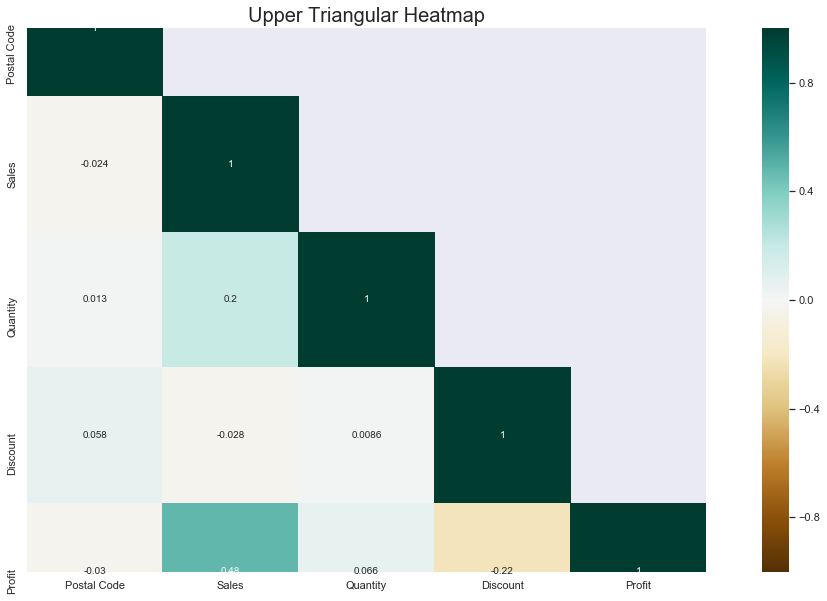

In [11]:
# CHECKING FOR CORRELATION
mask=np.array(df.corr())
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
ax.set_title('Upper Triangular Heatmap',fontsize=20)
fig.set_size_inches(20,10)
sns.heatmap(df.corr(),vmin=-1,vmax=1,square=True,annot=True,mask=mask,cmap='BrBG')

## As expected this Heatmap shows that Profit and Sales have moderate correlation.
## Now analysing the Profit made in each Region.

In [12]:
df2 = df.copy()
df2 = df2.pivot_table('Profit',columns='Region',aggfunc='sum')
df2

Region,Central,East,South,West
Profit,39706.3625,91522.78,46749.4303,108418.4489


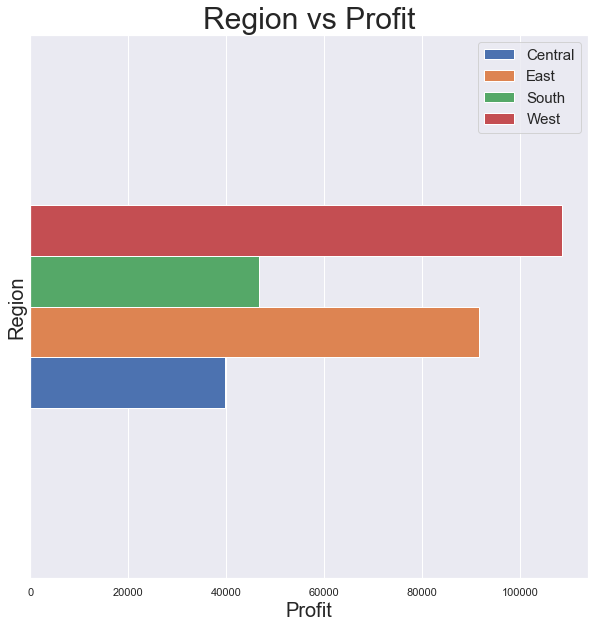

In [13]:
df2.reset_index(inplace=True,drop=True)
ax=df2.plot.barh(align='edge',width=0.3,figsize=(10,10))
ax.axes.yaxis.set_ticks([])
plt.xlabel('Profit',fontsize=20)
plt.ylabel('Region',fontsize=20)
plt.title('Region vs Profit',fontsize=30)
plt.legend(prop={'size': 15})
plt.show()

## This plot shows that the Profit contribution of the Region 'South' and 'Central' is low when compared to 'East' and 'West', hence this indirectly tells us that the Sales in that region is low
## Since Discount rate is a key incentive for customers to buy a product, it will be worthwhile to analyse the discount on each product grouped by region

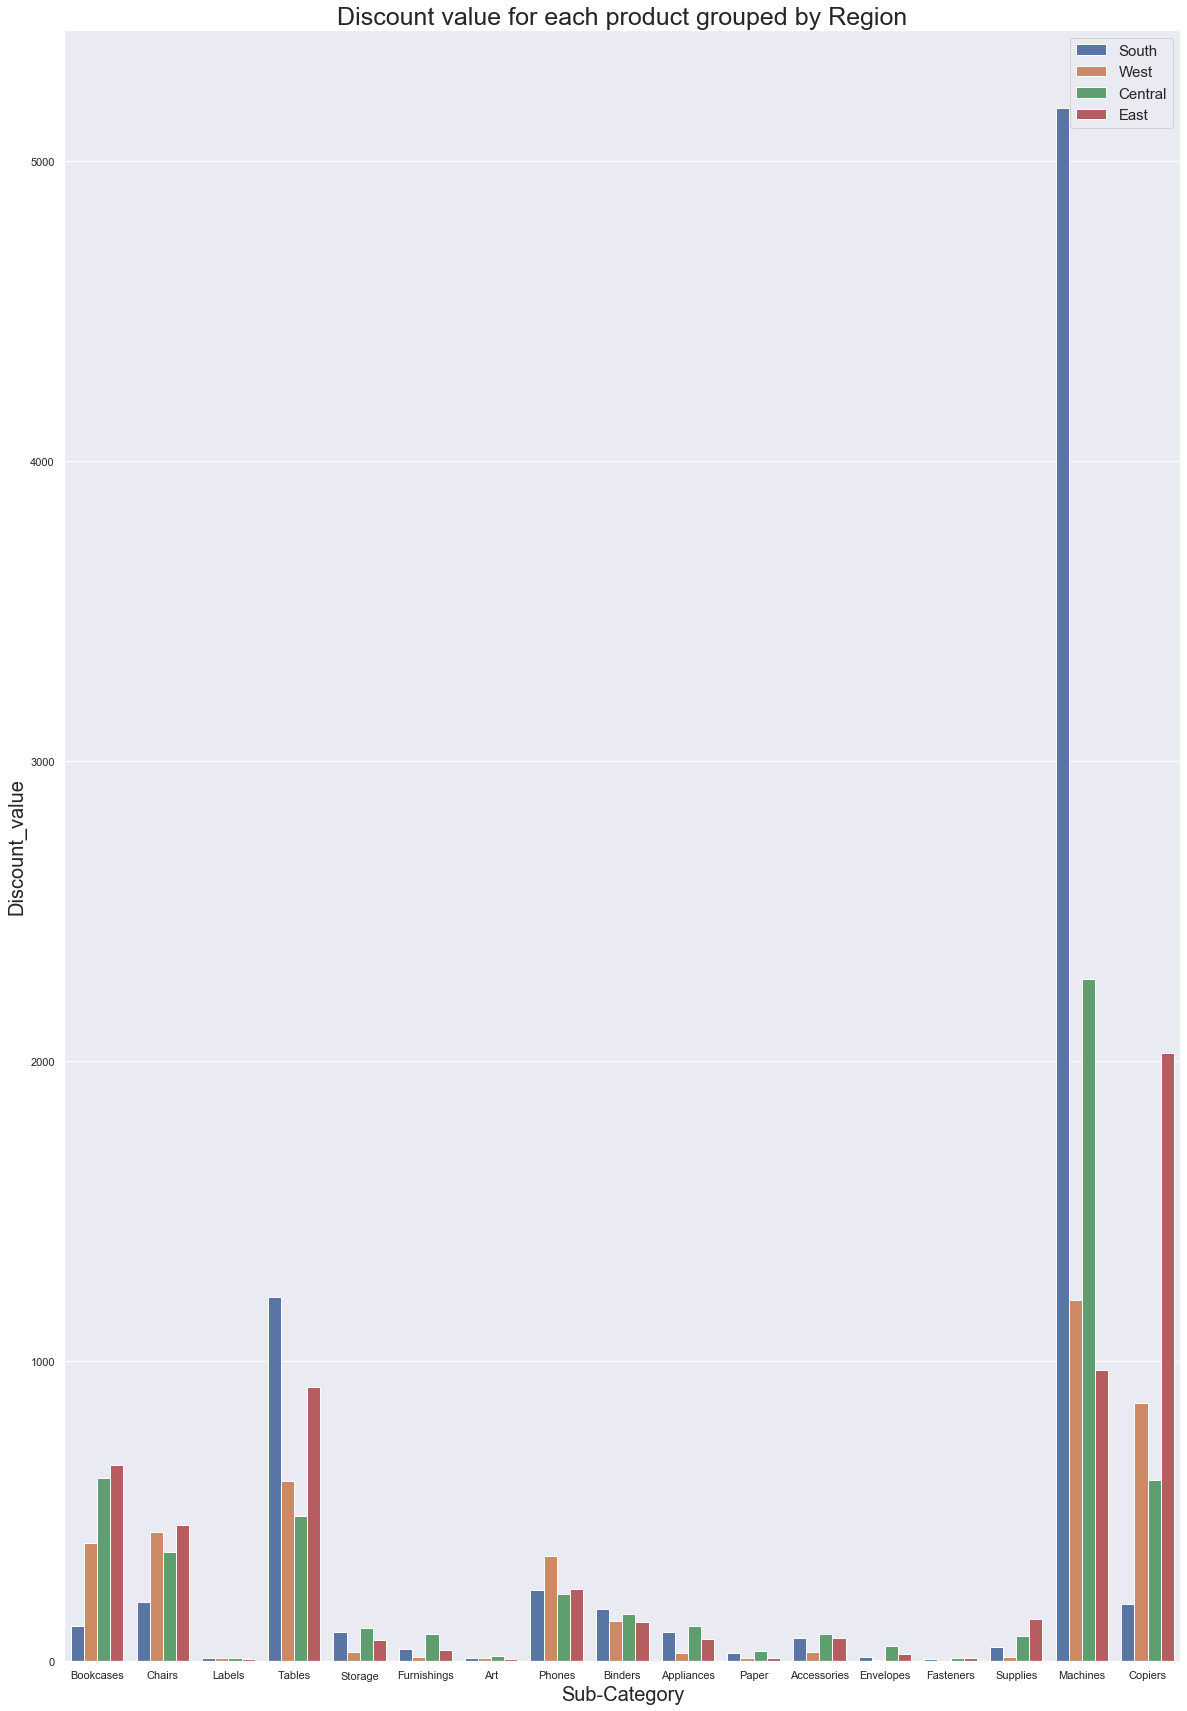

In [14]:
df4 = df.copy()
df4['Discount_value'] = (df4['Sales'] * df4['Quantity']) * df4['Discount'] 
plt.figure(figsize=(20,30))
ax=sns.barplot(x='Sub-Category',y='Discount_value',hue='Region',data=df4,ci=None)
ax.set_ylabel('Discount_value',fontsize=20)
ax.set_xlabel('Sub-Category',fontsize=20) 
plt.legend(prop={'size': 15})
plt.title('Discount value for each product grouped by Region',fontsize=25)
plt.show()

## After observing the barplot it can be seen that, only 3 Sub-Categories of products have significantly higher discount in the East region when compared to the South region.

## Therefore it is evident that only relying on Discounts is not going to attract more customers and increase profits. The SuperStore needs to focus on other marketing strategies like better Advertising,etc.

# ANALYSING TOTAL SALES FOR EACH 'CATEGORY'

In [15]:
df3 = df.copy()
df3['Sales'] = df['Sales'] * df['Quantity']
df3=df3.groupby(['Category'])['Sales'].sum()
df3 = pd.DataFrame(df3)
df3

,Sales
Category,
Furniture,3.859215e+06
Office Supplies,3.548585e+06
Technology,4.080262e+06


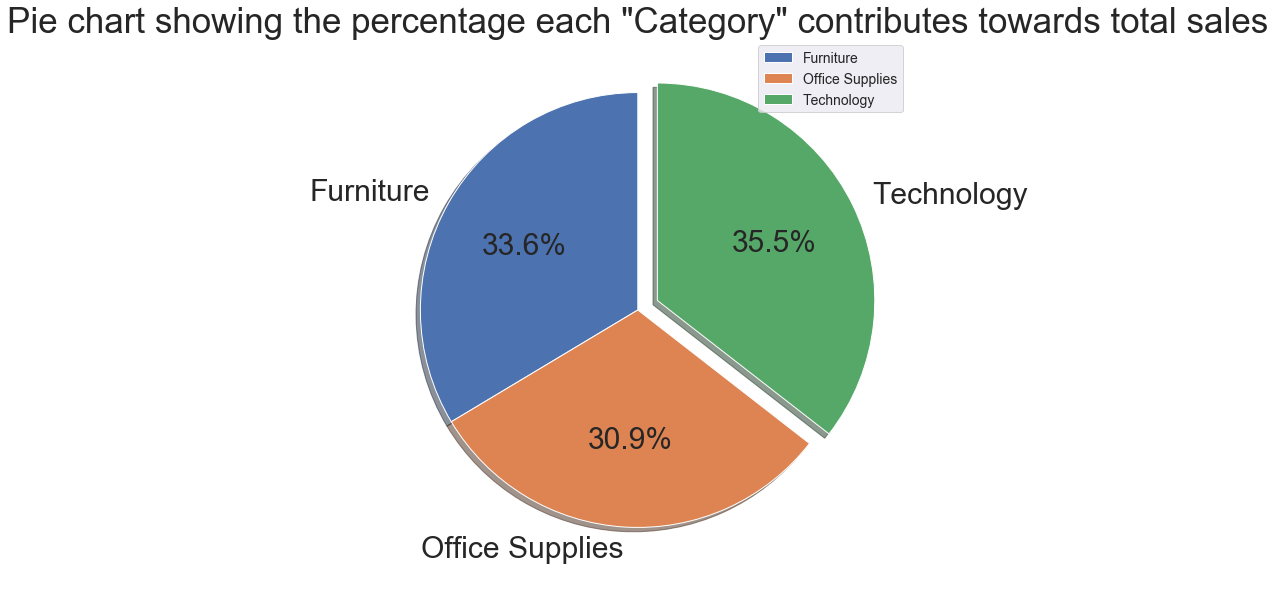

In [16]:
explode = (0, 0, 0.1)
ax=df3.plot(kind='pie',shadow = True,y='Sales', startangle=90,figsize=(15,10),autopct='%1.1f%%',explode=explode,fontsize=30)
ax.set_title('Pie chart showing the percentage each "Category" contributes towards total sales',fontsize=35)
ax.set_ylabel('')
plt.legend(loc='upper right',prop={'size': 14})

### All the Categories contribute nearly the same amount towards total sales.

## Now analysing the most preferred Shipment mode

In [17]:
df5 = df.copy()
df5=df5.groupby(['Ship Mode']).count().reset_index()
df5.drop(df5.columns.difference(['Ship Mode','Segment']), 1, inplace=True)
df5.loc[len(df.index)] = ['',0] 
df5.reset_index(drop=True)
df6=df5.sort_values(by=['Segment'])

C:\Users\Jais\new anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


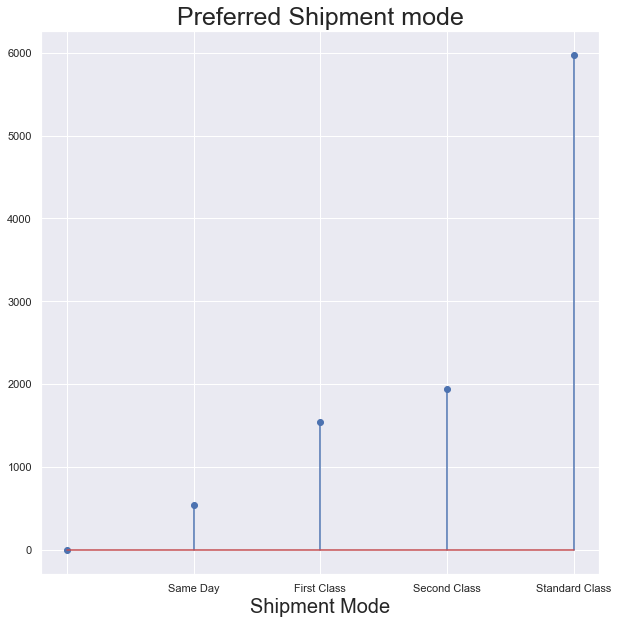

In [18]:
my_range=range(0,len(df6['Ship Mode']))
plt.figure(figsize=(10,10))
plt.stem(df6['Segment'])
plt.xticks(my_range,df6['Ship Mode'])
plt.xlabel('Shipment Mode',fontsize=20)
plt.title('Preferred Shipment mode',fontsize=25)
plt.show()

## This graph shows that Standard Class is the most preferred and Same Day is the least preferred Shipment mode

# Now analysing 'Segment'

In [19]:
df7 = df.copy()
df7['Sales'] = df7['Sales'] * df['Quantity']
df7=df7.groupby(['Segment'])['Sales'].sum()
df7 = pd.DataFrame(df7)
df7

,Sales
Segment,
Consumer,5.819347e+06
Corporate,3.516108e+06
Home Office,2.152607e+06


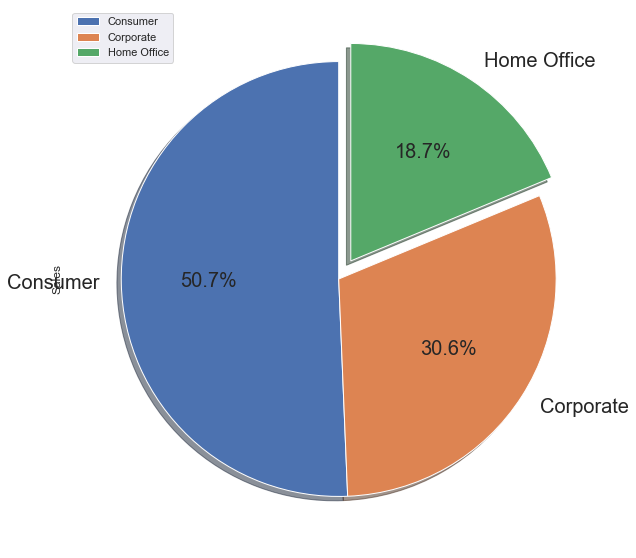

In [20]:
explode=(0,0,0.1)
ax=df7.plot(kind='pie',shadow = True,y='Sales', startangle=90,figsize=(15,10),autopct='%1.1f%%',explode=explode,fontsize=20)
my_circle = plt.Circle((0,0),0.7,color='white')
cir = plt.gcf()

### Consumers account for about half the sales in the SuperStore and Home offices account for the least sales.

# Areas where more profit can be made :
## South and Central region
## Sub-Category of products like Labels,Furnishings,Art,etc.
## Home-Office segment
# Business problem that can be derived :
## Despite giving decent levels of Discount in regions South and Central, the profit in those areas are very low which in turn means sales in that region is low as well. This is a business problem that needs to dealt with by using appropriate marketing strategies like better advertising,etc.
## Despite 'Same day' being the fastest mode of shipment its demand is the lowest. If the SuperStore can find better ways to market this type of shipment it can increase its number of customers.